<a href="https://colab.research.google.com/github/AndreMouraL/Engenharia-de-Controle-Tarefa-da-aula-dia-17.04/blob/main/Engenharia_de_Controle_Tarefa_da_aula_dia_17_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta tarefa será apenas para aprendizado e contará como ponto extra.

Vcs deverão resolver e simular (Matlab ou Python) as questões B.2.4, B.2.5, B.2.6, B.2.7, B.2.8, B.2.9, B.2.12 e B.2.13 do Cap. 2 do Livro do Ogata 5. ed.

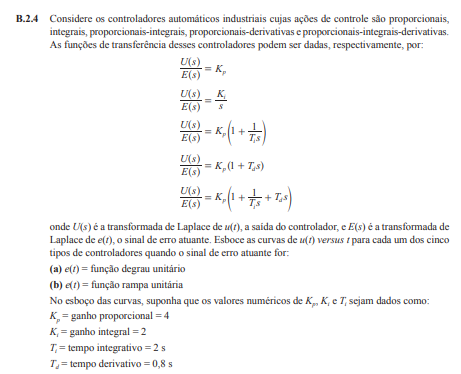

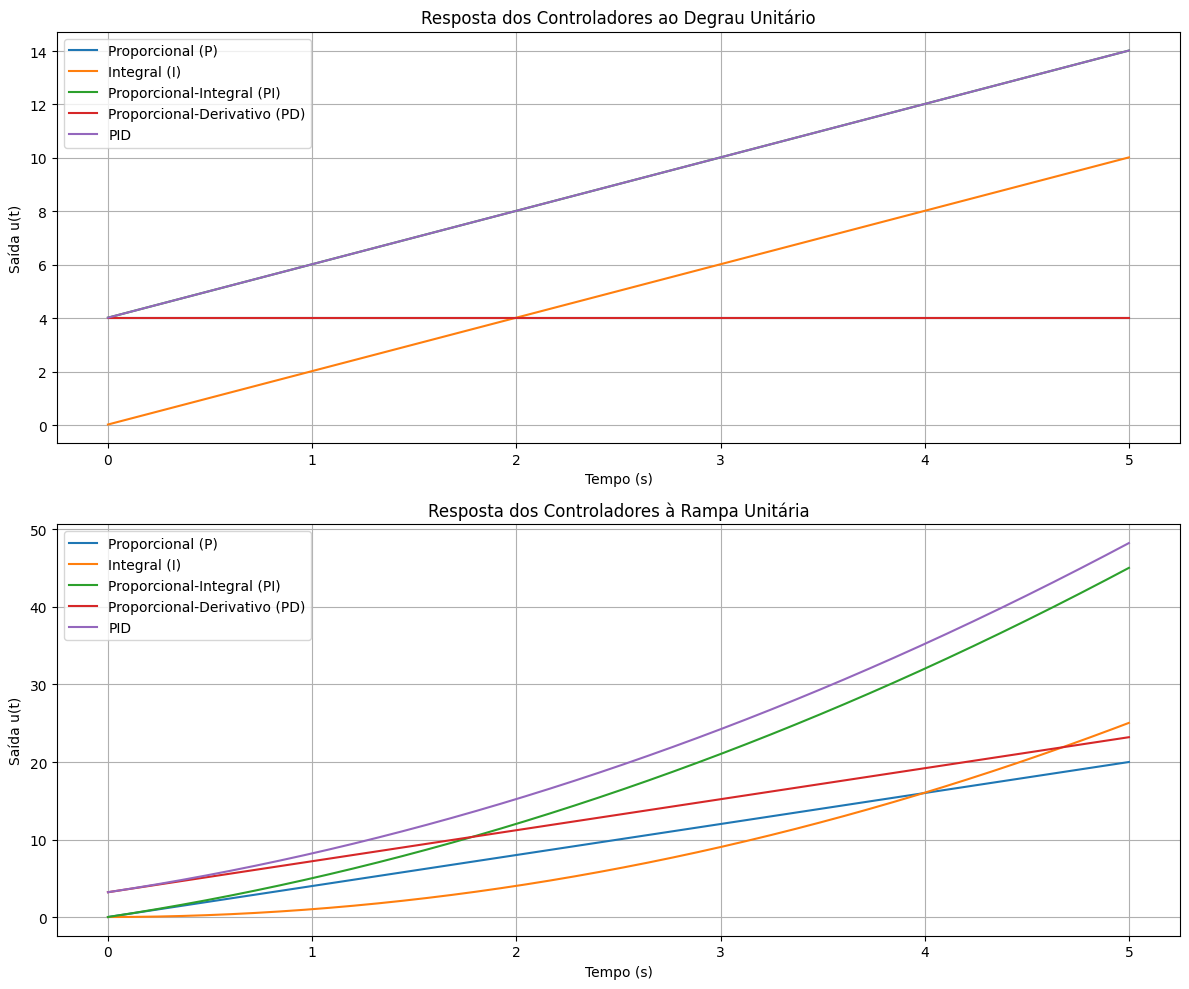

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros dos controladores
Kp = 4
Ki = 2
Ti = 2
Td = 0.8

# Configuração do tempo
t = np.linspace(0, 5, 500)

# Sinais de entrada
e_step = np.ones_like(t)  # Degrau unitário
e_ramp = t                # Rampa unitária

# Funções para calcular as saídas dos controladores
def proportional(e):
    return Kp * e

def integral(e, dt):
    return Ki * np.cumsum(e) * dt

def proportional_integral(e, dt):
    return Kp * e + (Kp/Ti) * np.cumsum(e) * dt

def proportional_derivative(e, de_dt):
    return Kp * e + Kp * Td * de_dt

def pid(e, de_dt, dt):
    return Kp * e + (Kp/Ti) * np.cumsum(e) * dt + Kp * Td * de_dt

# Cálculo das respostas para degrau
dt = t[1] - t[0]
de_step_dt = np.zeros_like(t)  # Derivada do degrau (impulso em t=0 não plotado)

u_p_step = proportional(e_step)
u_i_step = integral(e_step, dt)
u_pi_step = proportional_integral(e_step, dt)
u_pd_step = proportional_derivative(e_step, de_step_dt)
u_pid_step = pid(e_step, de_step_dt, dt)

# Cálculo das respostas para rampa
de_ramp_dt = np.ones_like(t)  # Derivada da rampa = 1

u_p_ramp = proportional(e_ramp)
u_i_ramp = integral(e_ramp, dt)
u_pi_ramp = proportional_integral(e_ramp, dt)
u_pd_ramp = proportional_derivative(e_ramp, de_ramp_dt)
u_pid_ramp = pid(e_ramp, de_ramp_dt, dt)

# Plotagem
plt.figure(figsize=(12, 10))

# Resposta ao degrau
plt.subplot(2, 1, 1)
plt.plot(t, u_p_step, label='Proporcional (P)')
plt.plot(t, u_i_step, label='Integral (I)')
plt.plot(t, u_pi_step, label='Proporcional-Integral (PI)')
plt.plot(t, u_pd_step, label='Proporcional-Derivativo (PD)')
plt.plot(t, u_pid_step, label='PID')
plt.title('Resposta dos Controladores ao Degrau Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída u(t)')
plt.legend()
plt.grid()

# Resposta à rampa
plt.subplot(2, 1, 2)
plt.plot(t, u_p_ramp, label='Proporcional (P)')
plt.plot(t, u_i_ramp, label='Integral (I)')
plt.plot(t, u_pi_ramp, label='Proporcional-Integral (PI)')
plt.plot(t, u_pd_ramp, label='Proporcional-Derivativo (PD)')
plt.plot(t, u_pid_ramp, label='PID')
plt.title('Resposta dos Controladores à Rampa Unitária')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída u(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

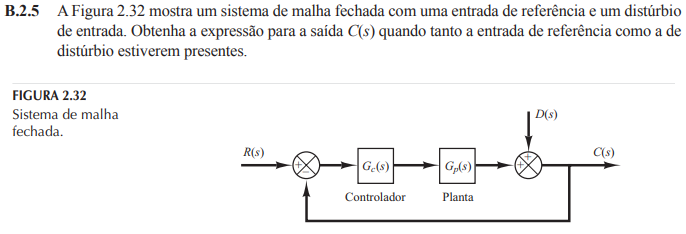

In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.1 MB/s eta 0:00:00


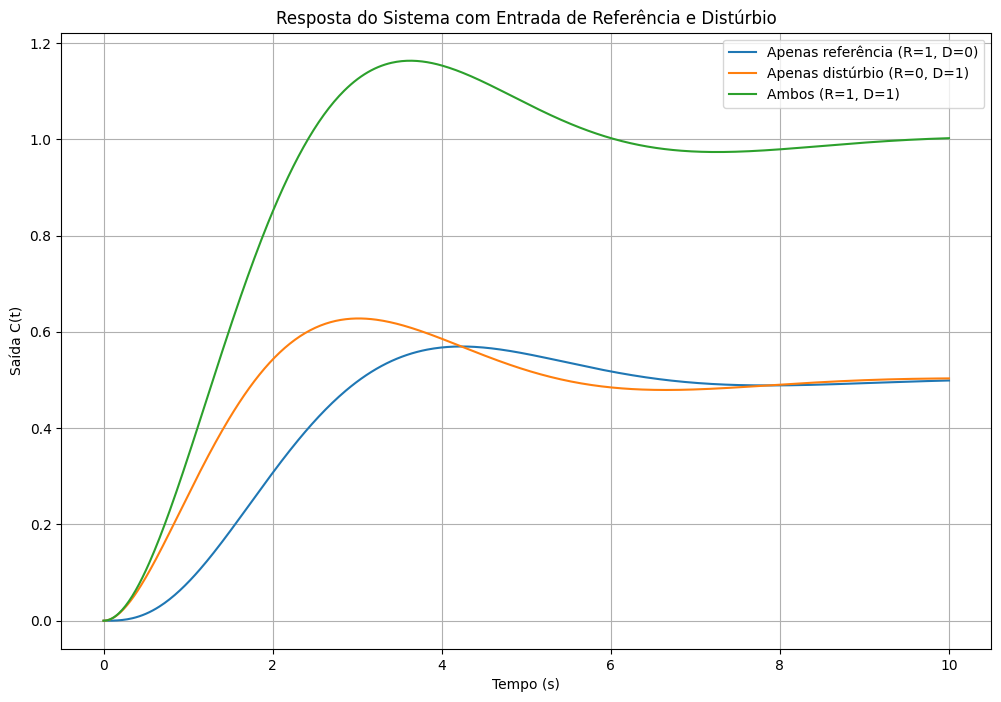

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo as funções de transferência (exemplo genérico)
s = ctrl.TransferFunction.s
Gc = 1/(s + 1)  # Controlador exemplo
Gp = 1/(s**2 + 2*s + 1)  # Planta exemplo

# Função para calcular a resposta do sistema
def system_response(Gc, Gp, R, D):
    # Função de transferência de R para C
    C_R = ctrl.series(Gc, Gp)/(1 + ctrl.series(Gc, Gp))
    # Função de transferência de D para C
    C_D = Gp/(1 + ctrl.series(Gc, Gp))

    # Respostas no tempo
    t, y_R = ctrl.step_response(C_R, T=np.linspace(0, 10, 500))
    t, y_D = ctrl.step_response(C_D, T=np.linspace(0, 10, 500))

    # Resposta total
    y_total = R*y_R + D*y_D

    return t, y_total

# Caso 1: Apenas entrada de referência (R = 1, D = 0)
t1, y1 = system_response(Gc, Gp, R=1, D=0)

# Caso 2: Apenas distúrbio (R = 0, D = 1)
t2, y2 = system_response(Gc, Gp, R=0, D=1)

# Caso 3: Ambos os sinais (R = 1, D = 1)
t3, y3 = system_response(Gc, Gp, R=1, D=1)

# Plotagem
plt.figure(figsize=(12, 8))

plt.plot(t1, y1, label='Apenas referência (R=1, D=0)')
plt.plot(t2, y2, label='Apenas distúrbio (R=0, D=1)')
plt.plot(t3, y3, label='Ambos (R=1, D=1)')

plt.title('Resposta do Sistema com Entrada de Referência e Distúrbio')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída C(t)')
plt.legend()
plt.grid()
plt.show()

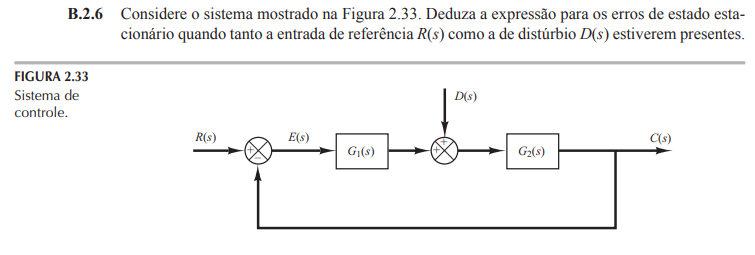

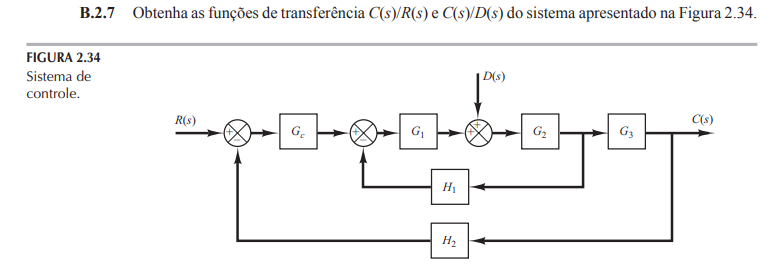

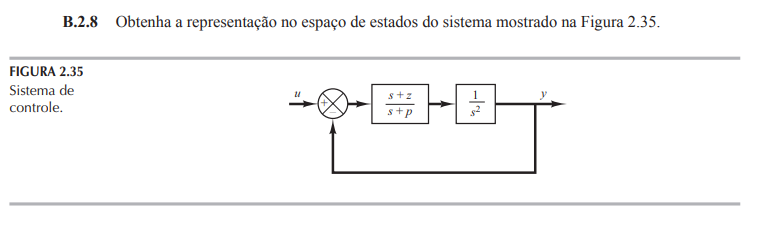

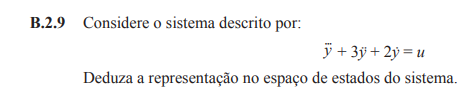

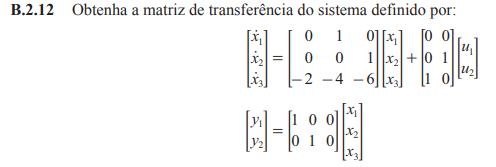

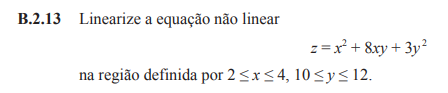